In [12]:
!pip install pdfplumber



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [15]:
import pdfplumber

with pdfplumber.open("/home/marvin/Escritorio/IEASEN-2023.pdf") as pdf:
    page = pdf.pages[150]  # página 100 (índice inicia en 0)
    table = page.extract_table()
    for row in table:
        print(row)

['HIDROELÉCTRICA', None, None, None, None]
['PLANTA', 'CAPACIDAD\nINSTALADA (MW)', 'GENERACIÓN\nBRUTA (MWh)', 'CONSUMO PROPIO\n(MWh)', 'GENERACIÓN NETA']
['CAÑAVERAL', '29.00', '116,980.31', '741.26', '116,239.06']
['EL CAJON', '300.00', '1,254,328.25', '9,748.77', '1,244,579.48']
['PATUCA', '104.70', '256,938.29', '8,227.72', '248,710.57']
['ARENAL', '61.62', '168,934.33', '1,367.75', '167,566.58']
['RIO LINDO', '80.00', '427,632.93', '2,149.91', '425,483.02']
['SHOL', '33.75', '84,644.42', '1,439.37', '83,205.04']
['VEGONA', '41.00', '187,179.69', '1,771.89', '185,407.79']
['NACAOME', '28.12', '30,285.26', '246.15', '30,039.11']
['ZACAPA HIDRO', '0.75', '2,634.09', '45.47', '2,588.62']
['RIO BLANCO', '5.00', '33,394.39', '50.28', '33,344.11']
['LAS NIEVES', '0.48', '-', '-', '-']
['LA ESPERANZA', '13.50', '31,665.52', '848.95', '30,816.57']
['BABILONIA(ENERGISA)', '4.40', '22,575.05', '127.18', '22,447.87']
['HIDRO YOJOA', '0.63', '1,455.53', '79.35', '1,376.18']
['CECECAPA', '3.50',

In [16]:
table # es una lista

[['HIDROELÉCTRICA', None, None, None, None],
 ['PLANTA',
  'CAPACIDAD\nINSTALADA (MW)',
  'GENERACIÓN\nBRUTA (MWh)',
  'CONSUMO PROPIO\n(MWh)',
  'GENERACIÓN NETA'],
 ['CAÑAVERAL', '29.00', '116,980.31', '741.26', '116,239.06'],
 ['EL CAJON', '300.00', '1,254,328.25', '9,748.77', '1,244,579.48'],
 ['PATUCA', '104.70', '256,938.29', '8,227.72', '248,710.57'],
 ['ARENAL', '61.62', '168,934.33', '1,367.75', '167,566.58'],
 ['RIO LINDO', '80.00', '427,632.93', '2,149.91', '425,483.02'],
 ['SHOL', '33.75', '84,644.42', '1,439.37', '83,205.04'],
 ['VEGONA', '41.00', '187,179.69', '1,771.89', '185,407.79'],
 ['NACAOME', '28.12', '30,285.26', '246.15', '30,039.11'],
 ['ZACAPA HIDRO', '0.75', '2,634.09', '45.47', '2,588.62'],
 ['RIO BLANCO', '5.00', '33,394.39', '50.28', '33,344.11'],
 ['LAS NIEVES', '0.48', '-', '-', '-'],
 ['LA ESPERANZA', '13.50', '31,665.52', '848.95', '30,816.57'],
 ['BABILONIA(ENERGISA)', '4.40', '22,575.05', '127.18', '22,447.87'],
 ['HIDRO YOJOA', '0.63', '1,455.53', '7

In [18]:
import pandas as pd

# 1. Supón que ya tienes la lista 'datos'
# 2. Elimina las primeras 2 filas que no son datos reales
datos_limpios = table[2:]

# 3. Usa la segunda fila como nombres de columna
columnas = table[1]
columnas = [col.replace('\n', ' ') if col else "DESCONOCIDA" for col in columnas]

# 4. Crea el DataFrame
df = pd.DataFrame(datos_limpios, columns=columnas)

# 5. (Opcional) Limpieza: elimina comas y convierte a numérico
for col in columnas[1:]:  # evita la primera columna que es el nombre de planta
    df[col] = df[col].str.replace(',', '').astype(float, errors='ignore')

# 6. (Opcional) Verifica
print(df.head())


      PLANTA  CAPACIDAD INSTALADA (MW) GENERACIÓN BRUTA (MWh)  \
0  CAÑAVERAL                     29.00              116980.31   
1   EL CAJON                    300.00             1254328.25   
2     PATUCA                    104.70              256938.29   
3     ARENAL                     61.62              168934.33   
4  RIO LINDO                     80.00              427632.93   

  CONSUMO PROPIO (MWh) GENERACIÓN NETA  
0               741.26       116239.06  
1              9748.77      1244579.48  
2              8227.72       248710.57  
3              1367.75       167566.58  
4              2149.91       425483.02  


In [19]:
df

,PLANTA,CAPACIDAD INSTALADA (MW),GENERACIÓN BRUTA (MWh),CONSUMO PROPIO (MWh),GENERACIÓN NETA
0,CAÑAVERAL,29.00,116980.31,741.26,116239.06
1,EL CAJON,300.00,1254328.25,9748.77,1244579.48
2,PATUCA,104.70,256938.29,8227.72,248710.57
3,ARENAL,61.62,168934.33,1367.75,167566.58
4,RIO LINDO,80.00,427632.93,2149.91,425483.02
5,SHOL,33.75,84644.42,1439.37,83205.04
6,VEGONA,41.00,187179.69,1771.89,185407.79
7,NACAOME,28.12,30285.26,246.15,30039.11
8,ZACAPA HIDRO,0.75,2634.09,45.47,2588.62
9,RIO BLANCO,5.00,33394.39,50.28,33344.11


In [21]:
import matplotlib.pyplot as plt

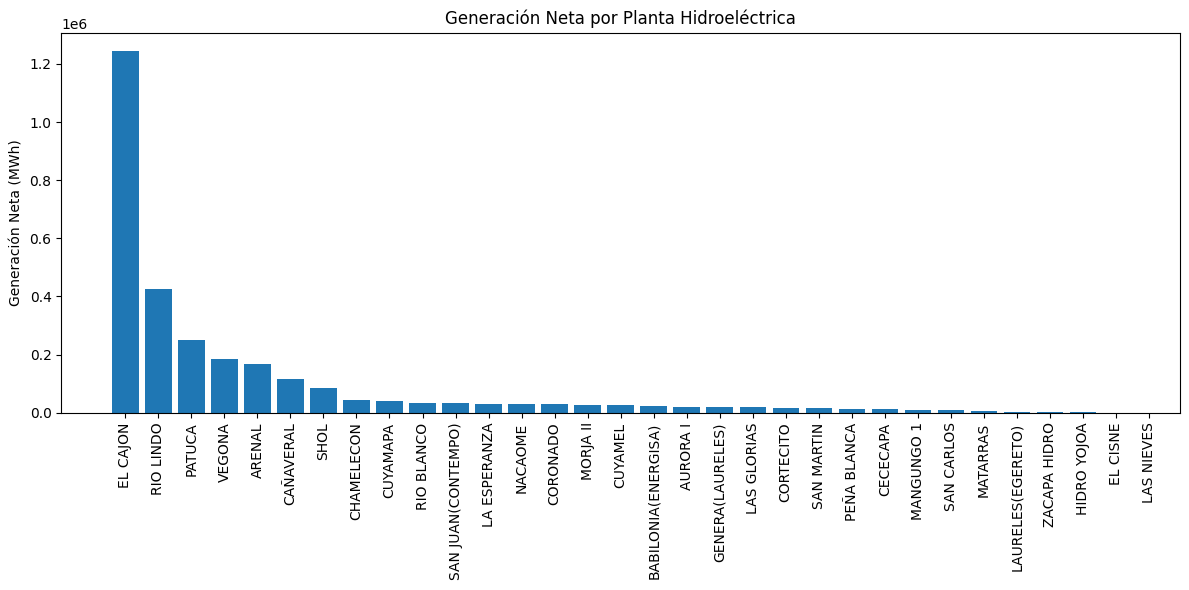

In [22]:
df['GENERACIÓN NETA'] = pd.to_numeric(df['GENERACIÓN NETA'], errors='coerce')

# Ordena por generación neta (opcional)
df_ordenado = df.sort_values('GENERACIÓN NETA', ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_ordenado['PLANTA'], df_ordenado['GENERACIÓN NETA'])
plt.xticks(rotation=90)
plt.ylabel('Generación Neta (MWh)')
plt.title('Generación Neta por Planta Hidroeléctrica')
plt.tight_layout()
plt.show()


In [ ]:
# Ejercicio 1: Hacer gráficos de capacidad instalada y generación bruta.

In [ ]:
# Ejercicio 2: Realizar un análisis semejante con los Anexos C y E del documento Informe_Calidad.pdf